In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
import sklearn.metrics
import time

import faiss  # KNN testing - python 3.5 only?
from scipy.stats import mode

import matplotlib.pyplot as plt 

from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
from scipy import stats



In [4]:
os_dir = os.path.abspath('')
os_dir_data = os.path.join(os_dir, r"data/original/")

test_csv_path = os_dir_data + "1000_test.csv"
train_csv_path = os_dir_data + "1000_train.csv"

header_list = ["# label","f0","f1","f2","f3","f4","f5","f6","f7","f8","f9","f10","f11","f12","f13","f14","f15","f16","f17","f18","f19","f20","f21","f22","f23","f24","f25","f26"]

test_df = pd.read_csv(test_csv_path, names=header_list, skiprows=[0])  # skip row 0 because we are creating our own header
train_df = pd.read_csv(train_csv_path, names=header_list, skiprows=[0])  # skip row 0 because we are creating our own header


In [ ]:
print(test_df.shape)
print(train_df.shape)

####### scale data

df_columns = list(test_df.columns)

df_columns_features = df_columns
df_columns_label = df_columns[0]
df_columns_features.pop(0)


print(df_columns_features)
print(type(df_columns_features))

In [3]:
n_samples = 3500000  # 200000

####### Separate the label from the normal dataframe

test_subsample_df = test_df.sample(n=n_samples, random_state=1)
train_subsample_df = train_df.sample(n=n_samples*2, random_state=1)

test_subsample_label_arr = np.array(test_subsample_df[df_columns_label])
test_subsample_df = test_subsample_df.drop(columns=df_columns_label)

train_subsample_label_arr = np.array(train_subsample_df[df_columns_label])
train_subsample_df = train_subsample_df.drop(columns=df_columns_label)
#######


###### Perform PCA on the subsample (if desired)
do_perform_pca = True
if do_perform_pca:
    pca = PCA(.95, random_state=1)

    pca.fit(train_subsample_df)  # fit pca on training set

    print(f"Total shape: {len(train_subsample_df.columns)}, PCA Component count: {pca.components_.shape}")

    # transform the test and train
    train_subsample_df = pca.transform(train_subsample_df)
    test_subsample_df = pca.transform(test_subsample_df)

NameError: name 'test_df' is not defined

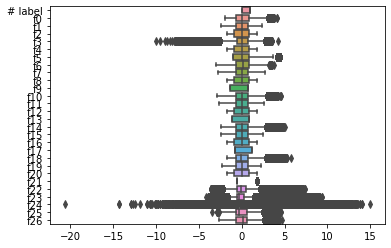

In [7]:
import seaborn as sns



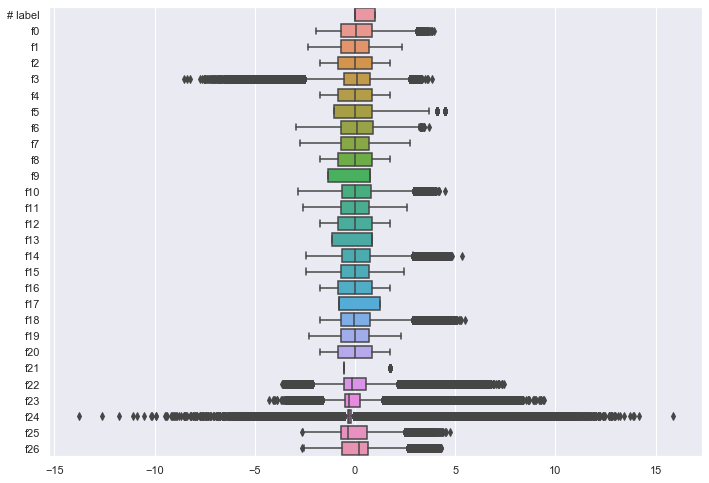

In [9]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.boxplot(data=test_df, orient="h")